#### Computation Describtion:
This dataset contains a large number of 32 x 32 thumbnail images containing aerial photos of a columnar cactus (Neobuxbaumia tetetzo). Kaggle has resized the images from the original dataset to make them uniform in size. The file name of an image corresponds to its id.You must create a classifier capable of predicting whether an images contains a cactus.


In [48]:
import pandas as pd
import os,cv2
from IPython.display import Image
from keras.preprocessing import image
from keras import optimizers
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import numpy as np
import numpy as np
from tensorflow.keras.optimizers import RMSprop

In [2]:
train_dir= r"C:\Users\melih\Desktop\Data Science(Yapay Zeka)\Kaggle 20 Projects\Aerial Cactus Identification\train\train"
test_dir=r"C:\Users\melih\Desktop\Data Science(Yapay Zeka)\Kaggle 20 Projects\Aerial Cactus Identification\test"
train=pd.read_csv('train.csv')

df_test=pd.read_csv('sample_submission.csv')

## EDA
### Data exploration
Examining the dataset to understand its structure, size, and the types of variables it contains.

In [3]:
train.head(5)
train.has_cactus=train.has_cactus.astype(str)

In [4]:
print('out dataset has {} rows and {} columns'.format(train.shape[0],train.shape[1]))

out dataset has 17500 rows and 2 columns


### Data Visualization
Creating visual representations of the data to help identify patterns, trends, and outliers.

C:\Users\melih\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    13136
0     4364
Name: has_cactus, dtype: int64

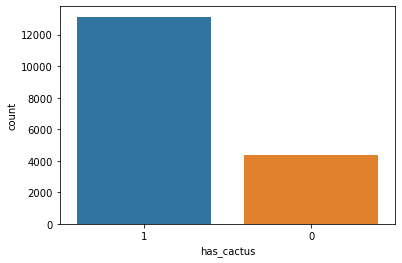

In [5]:
sns.countplot(train['has_cactus'])
train['has_cactus'].value_counts()

In [6]:
print("The number of rows in test set is %d"%(len(os.listdir(r"C:\Users\melih\Desktop\Data Science(Yapay Zeka)\Kaggle 20 Projects\Aerial Cactus Identification\test"))))

The number of rows in test set is 4000


We dislayed an image here:

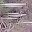

In [7]:
Image(os.path.join(r"C:\Users\melih\Desktop\Data Science(Yapay Zeka)\Kaggle 20 Projects\Aerial Cactus Identification\train\train",train.iloc[0,0]),width=250,height=250)

### Data Preparation

1-Read the picture files

2-Decode JPEG content to RGB pixels

3-Convert this into floating tensors

4-Rescale pixel values (between 0 to 255) to [0,1] interval.

In [8]:
datagen=ImageDataGenerator(rescale=1./255)
batch_size=150

In [9]:


train_generator=datagen.flow_from_dataframe(dataframe=train[:15001],directory=train_dir,x_col='id',
                                            y_col='has_cactus',class_mode='binary',batch_size=batch_size,
                                            target_size=(150,150))


validation_generator=datagen.flow_from_dataframe(dataframe=train[15000:],directory=train_dir,x_col='id',
                                                y_col='has_cactus',class_mode='binary',batch_size=50,
                                                target_size=(150,150))



Found 5236 validated image filenames belonging to 2 classes.


C:\Users\melih\anaconda3\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 9765 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


Found 834 validated image filenames belonging to 2 classes.


C:\Users\melih\anaconda3\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 1666 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


### Data Modeling 
Creating models to make predictions or classify the data.

In [10]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [12]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(),metrics=['acc'])

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=25),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]


In [16]:
epochs = 10
history = model.fit_generator(train_generator,
          validation_data=validation_generator,
          epochs=epochs,
          verbose=1,
          shuffle=True,
          callbacks=callbacks)


C:\Users\melih\AppData\Local\Temp/ipykernel_7580/1047244098.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
35/35 [==============================] - 155s 4s/step - loss: 0.5182 - acc: 0.7578 - val_loss: 0.3020 - val_acc: 0.7818
Epoch 2/10
35/35 [==============================] - 151s 4s/step - loss: 0.3584 - acc: 0.8407 - val_loss: 0.2727 - val_acc: 0.9077
Epoch 3/10
35/35 [==============================] - 174s 5s/step - loss: 0.3127 - acc: 0.8795 - val_loss: 0.3969 - val_acc: 0.7602
Epoch 4/10
35/35 [==============================] - 165s 5s/step - loss: 0.2196 - acc: 0.9078 - val_loss: 0.1435 - val_acc: 0.9388
Epoch 5/10
35/35 [==============================] - 168s 5s/step - loss: 0.2401 - acc: 0.9066 - val_loss: 0.1323 - val_acc: 0.9484
Epoch 6/10
35/35 [==============================] - 168s 5s/step - loss: 0.1864 - acc: 0.9251 - val_loss: 0.1541 - val_acc: 0.9388
Epoch 7/10
35/35 [==============================] - 141s 4s/step - loss: 0.1373 - acc: 0.9433 - val_loss: 0.0951 - val_acc: 0.9592
Epoch 8/10
35/35 [==============================] - 93s 3s/step - loss: 0.1437 - ac

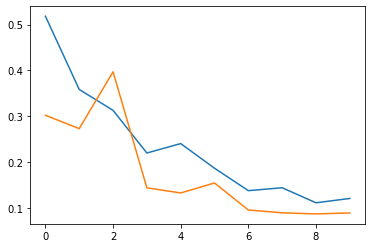

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [18]:
model.load_weights("best_model.h5")